In [15]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_diabetes 
diabetes = load_diabetes() 

df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target 
X = df.iloc[:,:-1]
y = df['target']

In [9]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(
X,y,test_size = 0.3, random_state= 42)

X_train.shape,y_train.shape

((309, 10), (309,))

<Axes: >

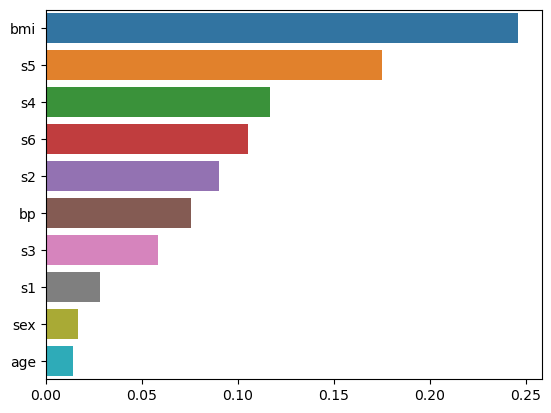

In [17]:
from sklearn.feature_selection import mutual_info_regression 
mutual_info = mutual_info_regression(X_train,y_train)
mi = pd.Series(mutual_info , index= X_train.columns)
mi= mi.sort_values(ascending= False) 
sns.barplot(x=mi,y=mi.index)

In [20]:
from sklearn.feature_selection import SelectKBest 
kbest = SelectKBest(mutual_info_regression , k=5)
kbest.fit(X_train,y_train)

SelectKBest(k=5, score_func=<function mutual_info_regression at 0x7fa524a30dc0>)

In [22]:
selected = kbest.get_feature_names_out()

In [25]:
# from figure also we can see this :
# now new x_train and x_test are  : 
X_train = X_train[selected]
X_test = X_test[selected]
X_train

,bmi,s2,s4,s5,s6
225,0.032595,-0.043589,0.034309,0.063015,0.003064
412,0.085408,0.013091,-0.002592,0.006207,0.085907
118,-0.010517,0.040022,0.034309,0.020609,0.056912
114,0.110198,-0.032942,0.020655,0.099241,0.023775
364,-0.006206,0.004949,0.034309,0.014821,0.098333
...,...,...,...,...,...
106,-0.076264,-0.034821,-0.039493,-0.059471,-0.083920
270,0.030440,-0.047347,-0.039493,0.008641,0.015491
348,-0.020218,-0.029497,-0.039493,-0.010903,-0.001078
435,-0.023451,0.004636,-0.002592,-0.038460,-0.038357
